Name : Khua Ching Yi 

Admin Number: 223905L

**Business Objective:**

You are tasked to train an ML model to predict the selling price of an HDB resale flat based on its characteristics e.g. distance to the Central Business District (CBD), distance to the nearest MRT station, floor area, floor level and remaining years of lease 

## < Task 1: Perform an Exploratory Data Analysis on Residential Dataset>

### Import Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from pycaret.regression import *

### Load Data

In [7]:
!pip install openpyxl

In [8]:
file_path = "01_residential_data.xlsx"
residential_data = pd.read_excel(file_path)

In [9]:
# Display the first few rows
residential_data.head()

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt
0,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,2016-01,3 ROOM,04 TO 06,68.0,New Generation,1981,342000.0,1.373922,103.855621,10065.227930,847.235690
1,333,ANG MO KIO AVENUE 1,ANG MO KIO,560333,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,327000.0,1.361343,103.851699,8662.831360,928.311457
2,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,3 ROOM,01 TO 03,67.0,New Generation,1980,280000.0,1.370816,103.859192,9749.916281,1094.432471
3,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,4 ROOM,07 TO 09,92.0,New Generation,1980,425000.0,1.370816,103.859192,9749.916281,1094.432471
4,331,ANG MO KIO AVENUE 1,ANG MO KIO,560331,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,338000.0,1.362111,103.850767,8747.934242,822.147955


### Exploratory Data Analysis

In this step, we will:

* Check for missing values.
* Generate statistical summaries for numerical and categorical variables.
* Create visualizations to explore relationships between variables.

**Missing Values**

In [10]:
# Check for missing values
missing_values = residential_data.isnull().sum()

# Show missing values
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
block                  0
street_name            0
town                   0
postal_code            0
month                  0
flat_type              0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
latitude               0
longitude              0
cbd_dist               0
min_dist_mrt           0
dtype: int64


There are no missing values in any of the columns. This indicates that the dataset is complete and does not require any imputation or removal of rows due to missing data.

**Duplicates**

In [11]:
# Check for duplicate rows
duplicates = residential_data.duplicated().sum()

# Show the number of duplicate rows
print("\nNumber of duplicate rows:")
print(duplicates)


Number of duplicate rows:
349


In some datasets, rows that appear to be duplicates might actually be aggregated data that shouldn't be removed. For example, a dataset showing daily sales might include multiple identical rows if the same amount was sold on multiple days. 

Hence, I will not be removing the duplicate rows 

In [12]:
# Generate summaries
summary_statistics = residential_data.describe()

# Display summaries
print("\nSummary statistics:")
print(summary_statistics)


Summary statistics:
         postal_code  floor_area_sqm  lease_commence_date  resale_price  \
count  176460.000000   176460.000000        176460.000000  1.764600e+05   
mean   560887.598725       97.449497          1995.223195  4.793598e+05   
std    190775.524205       24.049168            13.628932  1.651672e+05   
min     50004.000000       31.000000          1966.000000  1.400000e+05   
25%    510187.000000       82.000000          1985.000000  3.600000e+05   
50%    560565.000000       94.000000          1996.000000  4.480000e+05   
75%    730149.000000      112.000000          2005.000000  5.680000e+05   
max    825195.000000      259.000000          2019.000000  1.500000e+06   

            latitude      longitude       cbd_dist   min_dist_mrt  
count  176460.000000  176460.000000  176460.000000  176460.000000  
mean        1.367588     103.841673   12427.507031     831.510563  
std         0.042726       0.071216    4395.808395     464.516793  
min         1.270380     103.64

**Interpretation:**
- **Postal Code:** The postal codes range from 50,004 to 825,195, with a mean of around 560,887, suggesting a wide geographic spread within Singapore.
- **Floor Area (sqm):** The floor area ranges from 31 to 259 sqm, with a mean of approximately 97.45 sqm. Most flats fall between 82 sqm (25th percentile) and 112 sqm (75th percentile).
- **Lease Commencement Date:** The lease commencement dates range from 1966 to 2019, with an average commencement year of around 1995. The middle 50% of the data spans from 1985 to 2005.
- **Resale Price:** Resale prices range from 140,000 to 1,500,000 SGD, with an average price of around 479,359.80 SGD. The interquartile range (IQR) is from 360,000 to 568,000 SGD.
- **Latitude and Longitude:** These coordinates are typical for Singapore, with latitude ranging from approximately 1.27 to 1.46 and longitude from approximately 103.64 to 103.99.
- **Distance to CBD:** The distance to the Central Business District (CBD) varies significantly, from around 592 meters to over 23 kilometers, with a mean distance of about 12.43 kilometers.
- **Distance to MRT:** The distance to the nearest MRT station ranges from approximately 36 meters to 3.5 kilometers, with a mean distance of about 831.51 meters.

**Distribution of Resale Prices**

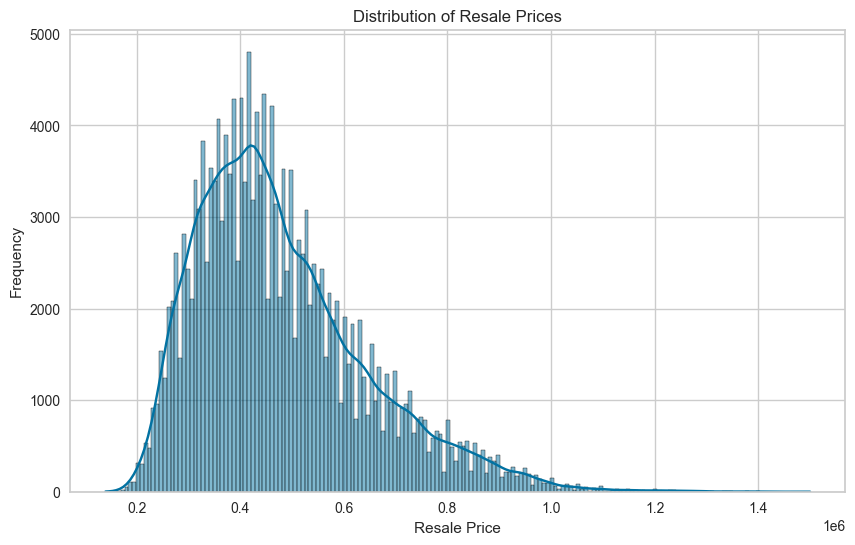

In [13]:
# Visualization: Distribution of resale prices
plt.figure(figsize=(10, 6))
sns.histplot(residential_data['resale_price'], kde=True)
plt.title('Distribution of Resale Prices')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.show()

**Interpretation:**
The histogram above shows the distribution of resale prices for HDB flats. The following observations can be made:

1. **Skewness:** The distribution is positively skewed, meaning that there are more lower-priced flats than higher-priced ones. Most resale prices cluster towards the lower end of the spectrum.
   
2. **Central Tendency:** The peak of the distribution occurs around 400,000 SGD, indicating that this is a common resale price point for many flats.
   
3. **Spread:** The resale prices range from about 140,000 SGD to 1.5 million SGD, demonstrating a wide range of prices influenced by factors such as flat type, location, and size.
   
4. **Outliers:** There are some high-priced flats that are relatively rare, as indicated by the long tail extending to the right. These might be larger flats or those located in highly sought-after areas.

5. **Frequency:** The most frequent resale prices are between 300,000 SGD and 600,000 SGD, with the highest frequency around 400,000 SGD.

Understanding this distribution helps in setting realistic expectations for resale prices and identifying factors that could influence higher prices, such as location, size, and amenities.

**Select only Numerical Coloumns for Correlation Matrix**

In [14]:
numeric_columns = residential_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = residential_data[numeric_columns].corr()

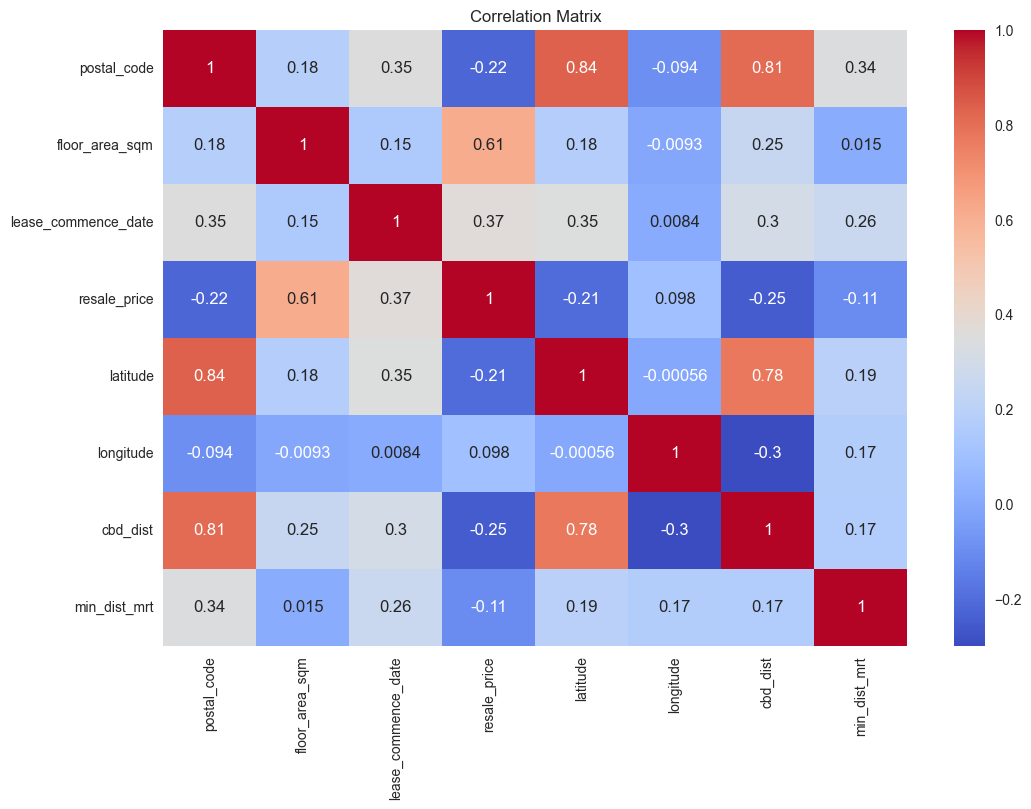

In [15]:
# Visualization: Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Interpretation:**
The correlation matrix above shows the pairwise correlation coefficients between the different numerical features in the dataset. The values range from -1 to 1, indicating the strength and direction of the relationships. Here are some key observations:

1. **Resale Price Correlations:**
   - **Floor Area (0.61):** There is a strong positive correlation between floor area and resale price. Larger flats tend to have higher resale prices.
   - **Lease Commencement Date (0.37):** There is a moderate positive correlation between the lease commencement date and resale price. Newer flats tend to have higher resale prices.
   - **CBD Distance (-0.25):** There is a weak negative correlation between the distance to the CBD and resale price. Flats closer to the CBD tend to have higher resale prices.
   - **Min Distance to MRT (-0.11):** There is a very weak negative correlation between the distance to the nearest MRT station and resale price. Flats closer to MRT stations may have slightly higher resale prices, but the effect is minimal.

2. **Other Notable Correlations:**
   - **Postal Code and Latitude (0.84):** There is a strong positive correlation between postal code and latitude. This indicates that as the postal code increases, the latitude also tends to increase, which could be due to the geographical layout of the area.
   - **Postal Code and CBD Distance (0.81):** There is a strong positive correlation between postal code and distance to the CBD. Higher postal codes tend to be further away from the CBD.
   - **Latitude and CBD Distance (0.78):** There is a strong positive correlation between latitude and distance to the CBD. Flats located further north tend to be further from the CBD.

3. **Low or No Correlations:**
   - **Longitude:** Longitude does not show strong correlations with any other variables in this dataset, indicating it may not be a significant factor in resale price determination.
   - **Min Distance to MRT:** This variable has weak correlations with other variables, suggesting its influence on other features is minimal.

Understanding these correlations helps in identifying which features are most influential on resale prices and can guide feature selection and engineering in the predictive modeling process.

In [16]:
residential_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176460 entries, 0 to 176459
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   block                176460 non-null  object 
 1   street_name          176460 non-null  object 
 2   town                 176460 non-null  object 
 3   postal_code          176460 non-null  int64  
 4   month                176460 non-null  object 
 5   flat_type            176460 non-null  object 
 6   storey_range         176460 non-null  object 
 7   floor_area_sqm       176460 non-null  float64
 8   flat_model           176460 non-null  object 
 9   lease_commence_date  176460 non-null  int64  
 10  resale_price         176460 non-null  float64
 11  latitude             176460 non-null  float64
 12  longitude            176460 non-null  float64
 13  cbd_dist             176460 non-null  float64
 14  min_dist_mrt         176460 non-null  float64
dtypes: float64(6), in

**Scatter Plot of Resale Price vs Floor Area**

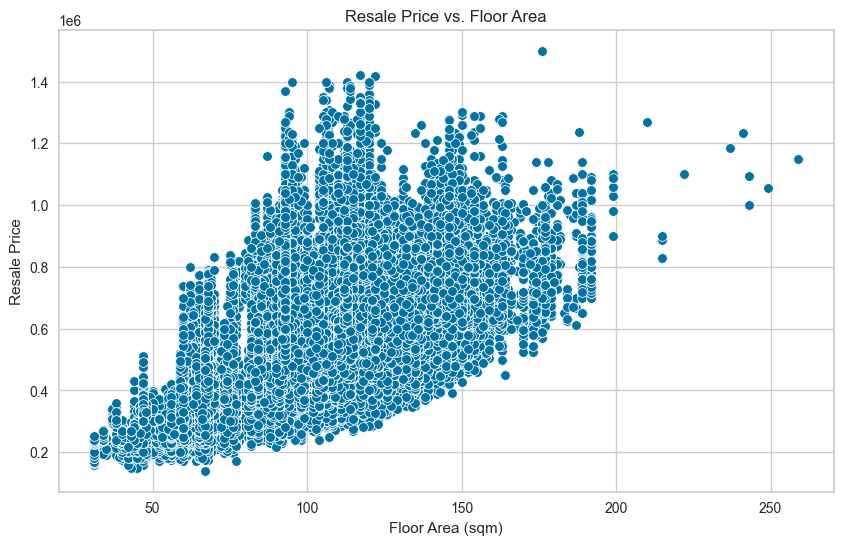

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=residential_data)
plt.title('Resale Price vs. Floor Area')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')
plt.show()

**Interpretation:**
The scatter plot above depicts the relationship between the resale price of HDB flats and their floor area (in sqm). The following observations can be made:

1. **Positive Correlation:** There is a clear positive correlation between floor area and resale price, indicating that larger flats generally command higher resale prices. This aligns with the earlier observation from the correlation matrix.

2. **Cluster Density:** The majority of the data points are densely clustered between 50 sqm and 150 sqm for floor area, and between 200,000 SGD and 1,000,000 SGD for resale price. This suggests that most flats fall within this range.

3. **Outliers:** A few points are located significantly above the main cluster, indicating very high resale prices for relatively larger flats (e.g., above 1,000,000 SGD and 150 sqm). These could represent premium flats in desirable locations or with unique features.

4. **Spread of Prices:** As the floor area increases, the spread of resale prices also increases. This means that larger flats can have a wide range of resale prices, potentially due to other influencing factors such as location, floor level, and amenities.

5. **Floor Area Limitations:** The smallest flats (around 30-50 sqm) and the largest flats (above 200 sqm) are relatively fewer, indicating these sizes are less common in the dataset.

Understanding this relationship helps in predicting the resale prices based on the floor area and identifying potential outliers or special cases that could influence the market.


**Box Plot of Resale Price by Flat Type**

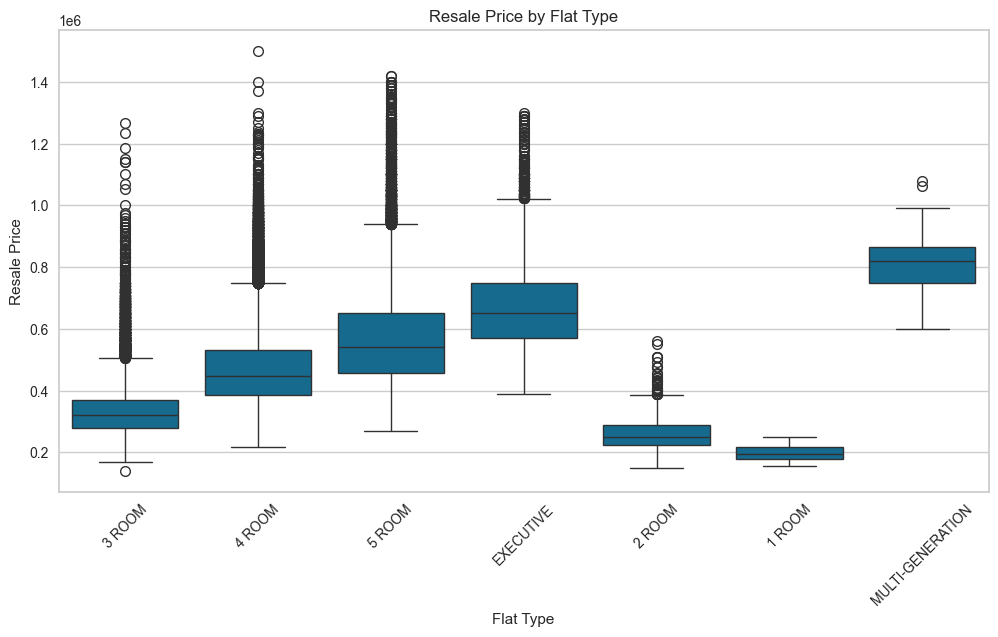

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='flat_type', y='resale_price', data=residential_data)
plt.title('Resale Price by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price')
plt.xticks(rotation=45)
plt.show()

**Interpretation:**
The box plot above shows the distribution of resale prices for different types of HDB flats. Each box represents the interquartile range (IQR) of resale prices for a specific flat type, with the whiskers extending to show the range of the data, excluding outliers. Here are some key observations:

1. **General Trend:**
   - There is a clear trend where larger flats (in terms of room count) generally have higher resale prices. This is consistent with the positive correlation observed between floor area and resale price.

2. **3-Room Flats:**
   - The median resale price for 3-room flats is lower compared to other flat types, around 400,000 SGD. There are some outliers, but the majority of resale prices fall between 300,000 and 500,000 SGD.

3. **4-Room and 5-Room Flats:**
   - These flats show higher median resale prices, with 4-room flats around 500,000 SGD and 5-room flats around 600,000 SGD. There are many outliers, indicating a wide range of resale prices influenced by other factors such as location and condition of the flat.

4. **Executive Flats:**
   - Executive flats have a higher median resale price, around 700,000 SGD. The range of prices is also wider, reflecting the variability in this flat type.

5. **2-Room and 1-Room Flats:**
   - These flats have lower resale prices, with 2-room flats having a median price around 250,000 SGD and 1-room flats around 200,000 SGD. The price ranges are narrower, indicating less variability in resale prices for these smaller flats.

6. **Multi-Generation Flats:**
   - Multi-generation flats have the highest median resale price, around 800,000 SGD. The range is quite large, but there are fewer outliers compared to other flat types.

7. **Outliers:**
   - There are several outliers in each flat type, indicating instances where flats are sold at prices significantly higher or lower than the typical range. These outliers could be due to unique features, premium locations, or other factors.

Understanding the resale price distribution by flat type helps in identifying which types of flats are in higher demand and tend to fetch higher prices in the market. This information is useful for buyers, sellers, and investors in making informed decisions.


**Scatter Plot for Resale Price vs Distance to CBD**

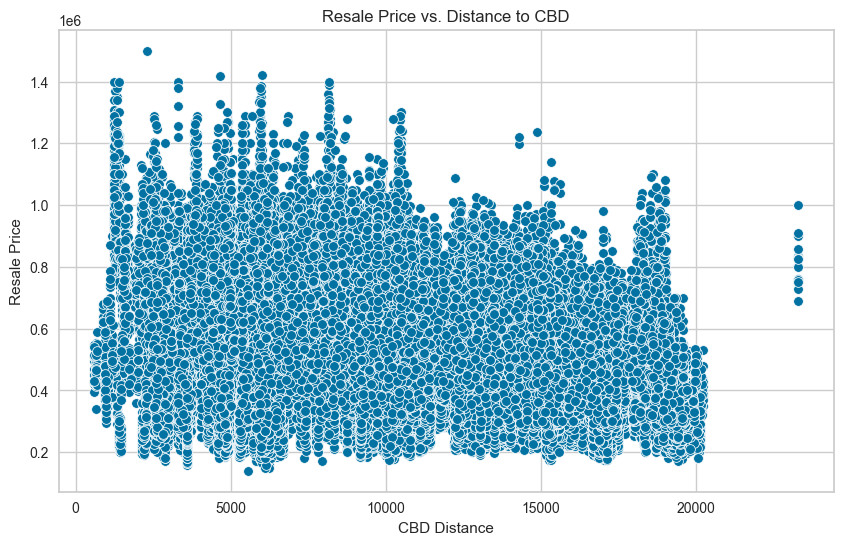

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cbd_dist', y='resale_price', data=residential_data)
plt.title('Resale Price vs. Distance to CBD')
plt.xlabel('CBD Distance')
plt.ylabel('Resale Price')
plt.show()

**Interpretation:**
The scatter plot above shows the relationship between resale prices and the distance to the Central Business District (CBD) for HDB flats. Each point represents a flat, with the resale price on the y-axis and the distance to the CBD on the x-axis. Here are some key observations:

1. **General Trend:**

- There is a slight negative trend where resale prices tend to decrease as the distance to the CBD increases. However, the relationship is not strong, as prices vary significantly at almost every distance.

2. **High Concentration Near CBD:**

- There is a high concentration of data points (flats) within the 0 to 5,000 meters range from the CBD. This indicates that many HDB flats are located relatively close to the CBD, and these tend to have higher resale prices, with many around 1 million SGD.

3. **Price Variability:**

- There is significant variability in resale prices at every distance. For instance, at distances between 0 to 15,000 meters, resale prices range from below 200,000 SGD to above 1 million SGD. This suggests that factors other than proximity to the CBD, such as flat size, condition, and nearby amenities, also play crucial roles in determining resale prices.

4. **Outliers:**

- There are a few outliers at distances greater than 20,000 meters from the CBD. These flats have a lower number of data points but tend to have resale prices that are still relatively high compared to others that are closer to the CBD. These could be due to unique characteristics of the flats or their locations, such as being in a highly sought-after suburban area.

5. **Cluster of High Prices:**

- Even though there's a general trend of decreasing prices with increasing distance from the CBD, there is a notable cluster of high resale prices (around 1.2 million SGD) for flats located around 10,000 meters from the CBD. This could indicate areas that are particularly desirable despite being farther from the CBD, possibly due to other attractive features like proximity to transport hubs or good schools.

This visualization helps to understand the influence of distance from the CBD on HDB resale prices, though it also highlights the importance of considering additional factors in predicting resale prices.

## < Task 2: Train, Validate and Develop a Machine Learning Pipeline using Pycaret>

In this step, we will:

* Initialize the PyCaret environment.
* Preprocess the data.
* Train multiple models using k-fold cross-validation.
* Evaluate model performance.
* Save the final model and log experiments.

### Setup

We will only keep features that are relevant to resale_price to prevent inconsistency or affect the performance of the data

In [20]:
regression_setup = setup(
    data=residential_data,
    target='resale_price',
    session_id=123,
    normalize=True,
    remove_outliers=True,
    
    #based on correlation matrix 
    ignore_features=['block', 'street_name', 'town', 'postal_code', 'month', 'flat_model', 'latitude', 'longitude']
)

,Description,Value
0,Session id,123
1,Target,resale_price
2,Target type,Regression
3,Original data shape,"(176460, 15)"
4,Transformed data shape,"(170291, 29)"
5,Transformed train set shape,"(117352, 29)"
6,Transformed test set shape,"(52939, 29)"
7,Ignore features,8
8,Numeric features,4
9,Categorical features,2


**Interpretation**

1. **Data Overview**:

- Original Data Shape: (176460, 15)
- Transformed Data Shape: (176460, 29)
- Transformed Train Set Shape: (123521, 29)
- Transformed Test Set Shape: (52939, 29)

- The original dataset contained 176,460 records with 15 features. After transformation, it has 29 features, indicating that feature engineering and one-hot encoding were applied to transform categorical variables.
- The training set consists of 123,521 records, while the test set includes 52,939 records.

2. **Preprocessing and Transformation**

- Preprocessing involved imputation, normalization, remove_outliers and encoding:
- Simple imputation was used for missing values: numeric features were imputed with the mean, and categorical features with the mode.
- Z-score normalization was applied to standardize the numeric features.

**Log Target Variable**

In [21]:
import numpy as np

In [22]:
residential_data['resale_price'] = np.log(residential_data['resale_price'])

### Compare Models 

The `compare_models` function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores.

In [23]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,42768.1870,3013578518.8495,54893.2430,0.8894,0.1162,0.0937,4.3230
xgboost,Extreme Gradient Boosting,42761.2582,3043562880.0000,55163.9047,0.8883,0.1163,0.0934,0.5640
lightgbm,Light Gradient Boosting Machine,45028.8257,3326593071.2130,57671.4537,0.8779,0.1212,0.0985,0.6630
rf,Random Forest Regressor,44267.9986,3491366466.7988,59062.6810,0.8718,0.1262,0.0974,6.4790
knn,K Neighbors Regressor,45978.7766,3773816627.2000,61426.8934,0.8615,0.1259,0.0983,1.4880
et,Extra Trees Regressor,48232.6827,4477842373.6164,66857.9563,0.8357,0.1449,0.1081,5.8710
gbr,Gradient Boosting Regressor,52051.8649,4497418861.4027,67052.9459,0.8349,0.1381,0.1131,2.4810
dt,Decision Tree Regressor,50590.1593,4833339567.7870,69483.5045,0.8225,0.1448,0.1102,0.4740
lasso,Lasso Regression,62771.6539,6395815355.2704,79968.7930,0.7652,0.1885,0.1380,1.3630
ridge,Ridge Regression,62771.8259,6395839865.7763,79968.9474,0.7652,0.1885,0.1380,0.3700


Multiple models were trained and evaluated using 10-fold cross-validation. The following metrics were used to assess model performance:

  - **MAE (Mean Absolute Error):** Average absolute difference between the predicted and actual values.
  - **MSE (Mean Squared Error):** Average squared difference between the predicted and actual values.
  - **RMSE (Root Mean Squared Error):** Square root of MSE, representing the standard deviation of the residuals.
  - **R2 (R-squared):** Proportion of variance in the target variable that is predictable from the input features.
  - **RMSLE (Root Mean Squared Logarithmic Error):** Measures the ratio between the actual and predicted values.
  - **MAPE (Mean Absolute Percentage Error):** Average absolute percentage error between the predicted and actual values.
  - **TT (Sec):** Training time in seconds.

**Top Performing Model: Catboost Regressor (catboost):**
  - **MAE:** 42768.1870
  - **MSE:** 3013578518.8495
  - **RMSE:** 54893.2430
  - **R2:** 0.8894
  - **RMSLE:** 0.1162
  - **MAPE:** 0.0937	
  - **Training Time:** 4.4180 seconds
  
The Catboost Regressor (catboost) models performed the best in terms of error metrics and R-squared values. They have the lowest MAE and RMSE values, indicating better accuracy and lower prediction errors compared to other models.

### Experiment Logging

PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set log_experiment and experiment_name parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [24]:
s = setup(data=residential_data, 
          target='resale_price', 
          experiment_name='residential_experiment',  # Name of the experiment
          log_experiment='mlflow'       # Use MLflow for logging
         )

,Description,Value
0,Session id,433
1,Target,resale_price
2,Target type,Regression
3,Original data shape,"(176460, 15)"
4,Transformed data shape,"(176460, 57)"
5,Transformed train set shape,"(123521, 57)"
6,Transformed test set shape,"(52939, 57)"
7,Numeric features,7
8,Categorical features,7
9,Preprocess,True


### Tuning 

The `tune_model` function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter.

We will take the top 2 best performing model and tune it:

1. Catboost Regressor (catboost)
2. Extreme Gradient Boosting

**Catboost Regressor (catboost)**

In [25]:
catboost_model = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0407,0.0029,0.0534,0.9732,0.0038,0.0031
1,0.0413,0.0029,0.0542,0.9731,0.0039,0.0032
2,0.0408,0.0030,0.0549,0.9730,0.0039,0.0031
3,0.0409,0.0029,0.0537,0.9734,0.0038,0.0031
4,0.0411,0.0029,0.0541,0.9737,0.0039,0.0032
5,0.0409,0.0029,0.0538,0.9738,0.0038,0.0031
6,0.0409,0.0030,0.0544,0.9732,0.0039,0.0031
7,0.0409,0.0029,0.0539,0.9735,0.0039,0.0031
8,0.0413,0.0030,0.0550,0.9726,0.0039,0.0032


2024/08/21 16:33:05 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


In [26]:
# Tune catboost
tuned_cat = tune_model(catboost_model, n_iter=5, optimize='R2',fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0413,0.0030,0.0547,0.9726,0.0039,0.0032
1,0.0412,0.0030,0.0546,0.9729,0.0039,0.0032
2,0.0410,0.0030,0.0545,0.9728,0.0039,0.0032
Mean,0.0412,0.0030,0.0546,0.9728,0.0039,0.0032
Std,0.0001,0.0000,0.0001,0.0002,0.0000,0.0000


Fitting 3 folds for each of 5 candidates, totalling 15 fits


2024/08/21 16:33:55 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


**Intepretation**

1. Error Increase:

- MAE: The **Mean Absolute Error (MAE) increased slightly from 0.0409 to 0.0412**. This indicates that the model's average prediction error has slightly increased, suggesting that the predictions after tuning are slightly less accurate on average compared to the original model.
- MSE & RMSE: **Both the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) increased slightly after tuning**. The slight increase in RMSE indicates that the model's predictions are less precise compared to the original model.

2. Slight Decline in Model Fit:

- R²: The **R² score decreased from 0.9732 to 0.9728**. This decrease suggests that the tuned model explains slightly less variance in the target variable compared to the original model. Although the drop is modest, it reflects a minor reduction in the model's ability to capture the relationships between the features and the target variable.


In this case, tuning did not lead to an improvement in the model's performance. Both the error metrics (MAE, MSE, RMSE) and the R² score indicate a slight decline in the model's predictive accuracy and fit.


**Extreme Gradient Boosting**

In [27]:
# Create an Extreme Gradient Boosting (XGBoost) model
egb_model = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0438,0.0033,0.0574,0.9691,0.0041,0.0034
1,0.0444,0.0034,0.0582,0.9689,0.0042,0.0034
2,0.0445,0.0035,0.0592,0.9686,0.0042,0.0034
3,0.0448,0.0035,0.0588,0.9683,0.0042,0.0034
4,0.0447,0.0035,0.0591,0.9686,0.0042,0.0034
5,0.0445,0.0034,0.0584,0.9691,0.0042,0.0034
6,0.0448,0.0035,0.0588,0.9687,0.0042,0.0034
7,0.0438,0.0033,0.0576,0.9698,0.0041,0.0034
8,0.0451,0.0036,0.0597,0.9677,0.0043,0.0035


2024/08/21 16:34:04 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


In [28]:
# Tune EGB
tuned_egb = tune_model(egb_model, n_iter=5, optimize='R2', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0422,0.0031,0.0561,0.9712,0.0040,0.0032
1,0.0419,0.0031,0.0557,0.9719,0.0040,0.0032
2,0.0419,0.0031,0.0558,0.9715,0.0040,0.0032
Mean,0.0420,0.0031,0.0558,0.9715,0.0040,0.0032
Std,0.0002,0.0000,0.0002,0.0003,0.0000,0.0000


Fitting 3 folds for each of 5 candidates, totalling 15 fits


2024/08/21 16:34:37 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


**Intepretation**

1. Error Reduction:

- MAE: The **Mean Absolute Error (MAE) decreased from 0.0445 to 0.0420 after tuning**. This indicates that the model's average prediction error has reduced, making the predictions after tuning closer to the actual values.
- MSE & RMSE: **Both Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) have seen reductions after tuning**. Lower RMSE values indicate that the tuned model is making more accurate predictions and better fits the data.

2. Improvement in Model Fit:

- R²: The **R² score increased from 0.9687 to 0.9715 after tuning**, indicating that the tuned model explains more variance in the target variable. This improvement, although modest, reflects better overall performance in terms of the model's ability to capture the relationships between the features and the target variable.

**Finding the Best Model**

In [29]:
# Compare the tuned models
best_tuned_model = compare_models([tuned_cat, tuned_egb], sort='R2')

# Display the best-tuned model
print(best_tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,0.0406,0.0029,0.0539,0.9735,0.0039,0.0031,2.1420
1,Extreme Gradient Boosting,0.0410,0.0030,0.0546,0.9728,0.0039,0.0032,2.0810


2024/08/21 16:35:24 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/21 16:35:25 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


The **CatBoost Regressor outperformed the Extreme Gradient Boosting model**, with a higher R² score of 0.9735 compared to 0.9728 for XGBoost. Additionally, the CatBoost model has slightly lower MAE, MSE, and RMSE values, indicating that it has better predictive accuracy and fits the data more closely. 

### Model Evaluation: Analyzing the Best Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

**Residuals**

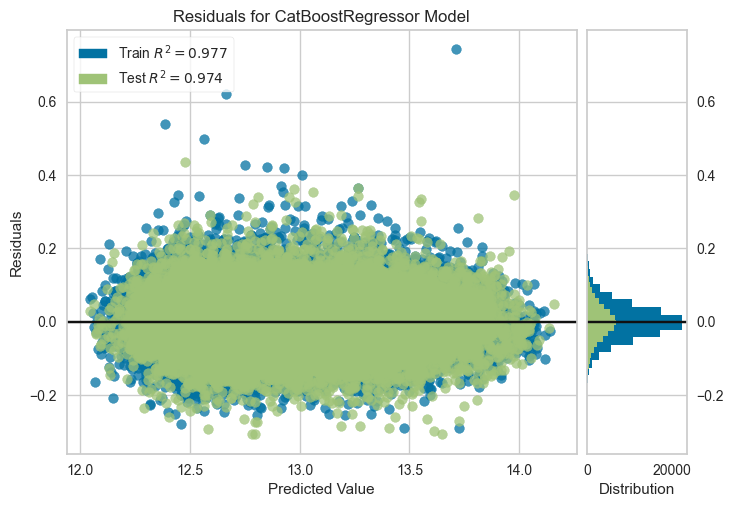

In [30]:
# plot residuals
plot_model(best_tuned_model, plot = 'residuals')

**Interpretation:**

- The residuals plot shows the differences between the actual and predicted values (residuals) on the y-axis against the predicted values on the x-axis.
- Both the train and test residuals are centered around zero, indicating that the model does not have a significant bias.
- The distribution of residuals is relatively symmetrical around the zero line, with no clear patterns, suggesting that the model is well-fitted.
- The R² values for both train (0.977) and test (0.974) sets are very close, indicating that the model generalizes well and is not overfitting.

Conclusion: The residuals plot looks good, with no apparent signs of underfitting or overfitting.

**Error**

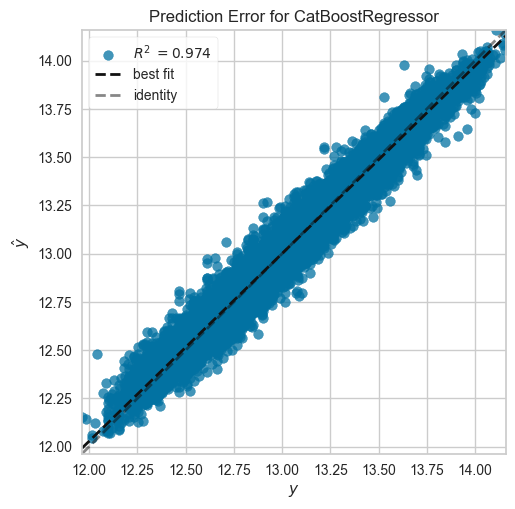

In [31]:
# plot error
plot_model(best_tuned_model, plot = 'error')

**Interpretation:**

- This plot compares the predicted values (ŷ) with the actual values (y) for the test set.
- The points are closely clustered around the identity line (the gray dashed line), which indicates a strong agreement between predicted and actual values.
- The R² value of 0.974 further supports that the model is performing well, with a high proportion of variance in the resale prices being explained by the model.

Conclusion: The prediction error plot confirms that the model predictions are accurate and consistent with the actual data.

**Feature Importance**

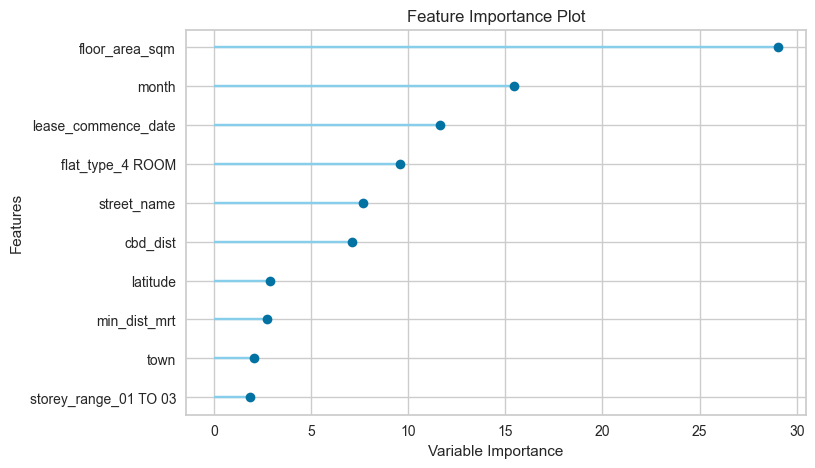

In [32]:
# plot feature importance
plot_model(best_tuned_model, plot = 'feature')

**Interpretation:**

1. Key Features

- **floor_area_sqm (Floor Area in Square Meters)**: This is the most important feature, indicating that the size of the flat significantly influences resale prices. Larger flats generally command higher prices.
- **month:** The second most important feature suggests that the time of sale (month) plays a crucial role in determining resale prices, potentially capturing market trends or seasonal variations.
- **lease_commence_date:** Ranking third, this feature implies that newer properties or those with longer remaining lease periods are valued higher in the resale market.
- **flat_type_4 ROOM:** The type of flat (specifically 4-room flats) also contributes significantly to the model's predictions, reflecting variations in demand for different flat types.
- **street_name:** Although not the most critical, the street name still holds some importance, possibly due to the perceived desirability of certain locations.
- **cbd_dist (Distance to Central Business District):** Proximity to the CBD is also a relevant factor, with closer properties being more valuable.

Conclusion: The feature importance plot confirms that the model effectively prioritizes the most relevant features, such as property size, time of sale, and lease commencement date, which are crucial for determining resale prices.

### Prediction

The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

The purpose of performing predictions, especially on a test set, is to validate how well your model generalizes to unseen data. This helps confirm whether the model's performance metrics (e.g., MAE, MSE, R²) from training and cross-validation are consistent when applied to new, unseen data.

In [33]:
# predict on test set
holdout_pred = predict_model(best_tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.0403,0.0029,0.0536,0.9738,0.0038,0.0031


In [34]:
# show predictions df
holdout_pred.head()

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,cbd_dist,min_dist_mrt,resale_price,prediction_label
80433,865,YISHUN STREET 81,YISHUN,760865,2019-11,5 ROOM,07 TO 09,122.0,Improved,1988,1.414268,103.838257,14587.265625,681.148743,13.034624,13.021967
46608,130,MARSILING RISE,WOODLANDS,730130,2018-05,3 ROOM,10 TO 12,60.0,Improved,1985,1.438126,103.778702,18960.656250,805.706177,12.380026,12.411059
3028,680,CHOA CHU KANG CRESCENT,CHOA CHU KANG,680680,2016-03,4 ROOM,10 TO 12,106.0,Premium Apartment,1999,1.403336,103.745132,17794.853516,712.169312,12.821259,12.769798
166717,183D,BOON LAY AVENUE,JURONG WEST,644183,2023-02,5 ROOM,07 TO 09,112.0,Improved,2015,1.349093,103.709038,17437.371094,1206.191895,13.389333,13.394048
16487,226,CHOA CHU KANG CENTRAL,CHOA CHU KANG,680226,2016-11,4 ROOM,07 TO 09,105.0,Model A,1993,1.381160,103.745293,16030.941406,475.959808,12.821259,12.822107


In [35]:
# copy data and drop charges

new_data = residential_data.copy()
new_data.drop('resale_price', axis=1, inplace=True)
new_data.head()

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,cbd_dist,min_dist_mrt
0,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,2016-01,3 ROOM,04 TO 06,68.0,New Generation,1981,1.373922,103.855621,10065.227930,847.235690
1,333,ANG MO KIO AVENUE 1,ANG MO KIO,560333,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,1.361343,103.851699,8662.831360,928.311457
2,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,3 ROOM,01 TO 03,67.0,New Generation,1980,1.370816,103.859192,9749.916281,1094.432471
3,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,4 ROOM,07 TO 09,92.0,New Generation,1980,1.370816,103.859192,9749.916281,1094.432471
4,331,ANG MO KIO AVENUE 1,ANG MO KIO,560331,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,1.362111,103.850767,8747.934242,822.147955


The purpose is to prepare a new dataset (new_data) that can be used for generating predictions, without including the target variable (resale_price). This step is necessary when you want to apply the trained model to new data or a different dataset where the target variable (resale price) is not known or not needed for prediction.

In [36]:
# predict model on new_data
predictions = predict_model(best_tuned_model, data = new_data)
predictions.head()

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,cbd_dist,min_dist_mrt,prediction_label
0,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,2016-01,3 ROOM,04 TO 06,68.0,New Generation,1981,1.373922,103.855621,10065.227539,847.235718,12.600488
1,333,ANG MO KIO AVENUE 1,ANG MO KIO,560333,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,1.361343,103.851700,8662.831055,928.311462,12.679892
2,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,3 ROOM,01 TO 03,67.0,New Generation,1980,1.370816,103.859192,9749.916016,1094.432495,12.529596
3,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,4 ROOM,07 TO 09,92.0,New Generation,1980,1.370816,103.859192,9749.916016,1094.432495,12.951230
4,331,ANG MO KIO AVENUE 1,ANG MO KIO,560331,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,1.362111,103.850769,8747.934570,822.147949,12.662017


**Intepretation:**

1. Overall Accuracy

The model demonstrates strong predictive performance with high R² and low error metrics on both the test set and new data. The predictions closely align with actual prices, indicating that the model is reliable and accurate.

This analysis indicates that the Catboost model, after tuning, is accurate and well-suited for predicting resale prices, offering valuable insights for stakeholders.

### Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [37]:
# save pipeline
save_model(best_tuned_model, 'my_residential_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['postal_code', 'floor_area_sqm',
                                              'lease_commence_date', 'latitude',
                                              'longitude', 'cbd_dist',
                                              'min_dist_mrt'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['block', 'street_name', 'town',
                                              'month', 'flat_type',
                                              'storey_range', 'flat_mo...
                                     transformer=OneHotEncoder(cols=['flat_type',
                                                                     'storey_range',
                                                                     'flat_model'],
                                               

In [38]:
# load pipeline
loaded_best_pipeline = load_model('my_residential_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=D:\Users\223905l\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['postal_code', 'floor_area_sqm',
                                             'lease_commence_date', 'latitude',
                                             'longitude', 'cbd_dist',
                                             'min_dist_mrt'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['block', 'street_name', 'town',
                                             '...
                                    transformer=OneHotEncoder(cols=['flat_type',
                                                                    'storey_range',
                                                                    'flat_model'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['block', 'street_name', 'town',
                                             'month'],
                                    transformer=TargetEncoder(cols=['block',
                                                                    'street_name',
                                                                    'town',
                                                                    'month'],
                                                              handle_missing='return_nan'))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x0000028CFE2362C0>)])

### Register the Model with MLflow

In [44]:
pip install mlflow pycaret

  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
Using cached referencing-0.35.1-py3-none-any.whl (26 kB)
  Attempting uninstall: referencing
    Found existing installation: referencing 0.30.2
    Uninstalling referencing-0.30.2:
      Successfully uninstalled referencing-0.30.2
Note: you may need to restart the kernel to use updated packages.


In [73]:
import mlflow

In [74]:
#ensure current active run ends
mlflow.end_run()

In [77]:
# Set up or create an experiment
experiment_name = "residential_experiment"  # Replace with your experiment name
mlflow.set_experiment(experiment_name)

2024/08/21 17:04:37 INFO mlflow.tracking.fluent: Experiment with name 'residential_experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/101856310394489724', creation_time=1724231077192, experiment_id='101856310394489724', last_update_time=1724231077192, lifecycle_stage='active', name='residential_experiment', tags={}>

In [78]:
model_name = 'my_residential_pipeline'

In [79]:
# Log the model with MLflow
with mlflow.start_run() as run:
    mlflow.log_artifact(f"{model_name}.pkl")  # Save model artifact
    model_uri = f"runs:/{run.info.run_id}/{model_name}"

2024/08/21 17:04:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run likeable-yak-832 at: http://127.0.0.1:5000/#/experiments/101856310394489724/runs/8b4a223b8a8740c7a122181948a11cf4.
2024/08/21 17:04:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/101856310394489724.


In [80]:
# Register the model with MLflow
registered_model = mlflow.register_model(model_uri, "resale_price_prediction_model")
print(f"Model registered: {registered_model.name}, version: {registered_model.version}")

Successfully registered model 'resale_price_prediction_model'.
2024/08/21 17:05:00 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: resale_price_prediction_model, version 1


Model registered: resale_price_prediction_model, version: 1


Created version '1' of model 'resale_price_prediction_model'.


### View Registered Models via MLflow Python API

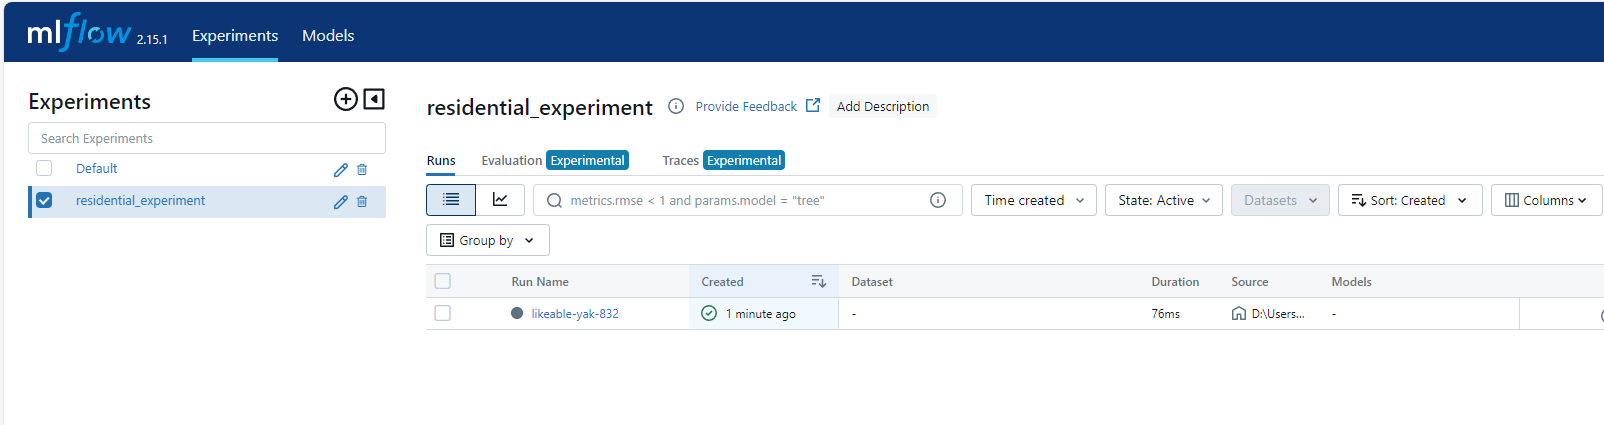

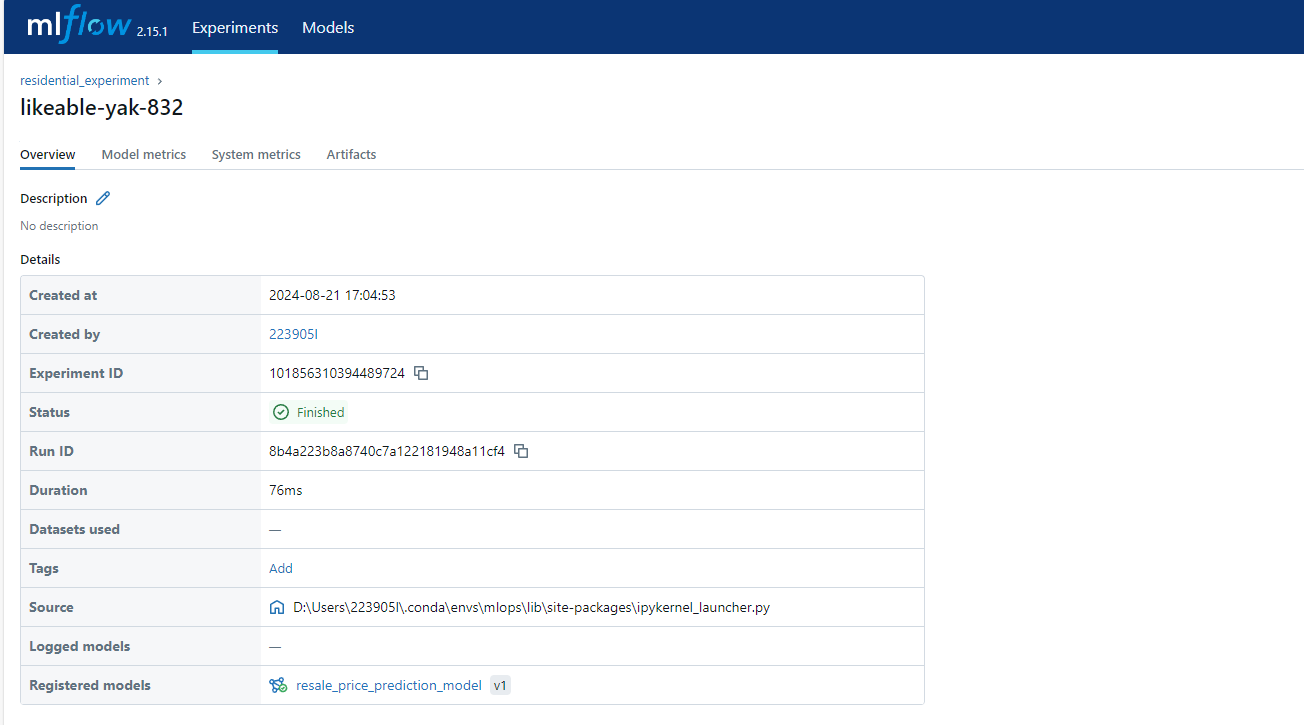